# Imports

In [1]:
# !pip install catboost
# !pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Misc
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Introduction to the Data

In [3]:
df = pd.read_csv("heart_attack.csv")

In [4]:
df.shape

(8763, 26)

In [5]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### It is first apparent here that the data doesnt contain any missing values

In [8]:
df["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

# Initial Cleaning

### To get the maximum values out of my plot, I would like to first convert the existing categorical columns into numeric ones that can be visualized.

#### categorical_columns = "Patient ID", "Sex", "Blood Pressure", "Diet", "Country", "Continent, "Hemisphere"

In [10]:
df["Patient ID"].str[:3].value_counts() # Mostly unique, dropping the column

Patient ID
MPX    6
BGV    5
OMJ    5
RLR    5
VAA    4
      ..
AWA    1
SUP    1
MQX    1
MVX    1
XKA    1
Name: count, Length: 6866, dtype: int64

In [11]:
df2 = df.drop(["Patient ID"],axis=1) #Patient ID

In [12]:
df.Sex.value_counts();

In [13]:
#Sex [One-Hot Encoding]
df2["Male"] = df.Sex.apply(lambda x: 1 if x == "Male" else 0)
df3 = df2.drop(["Sex"], axis=1)

In [14]:
# Blood Pressure
df3["Blood Pressure"]
split = pd.DataFrame(df3['Blood Pressure'].str.split('/').to_list(), columns = ['Systolic', 'Diastolic'])
df4 = pd.concat([df3, split], axis=1) 
df4.Systolic = df4.Systolic.astype(np.int32)
df4.Diastolic = df4.Diastolic.astype(np.int32)
df5 = df4.drop(['Blood Pressure'], axis = 1)

In [15]:
# Diet [Ordinal Encoding]
def encode_diet(x):
    if x == 'Healthy':
        return 0
    elif x == 'Average':
        return 1
    else:
        return 2

df5['Bad_Diet'] = df5['Diet'].apply(lambda x: encode_diet(x))
df6 = df5.drop(["Diet"], axis = 1)

#### One-Hot Encoding : "Country", "Continent", "Hemisphere", would result in too many columns that contain information that is barely if at all to "Heart Attack Risk". That is why I'm deciding to drop them.

In [16]:
df7 = df6.drop(["Country", "Continent", "Hemisphere"],axis = 1)

In [17]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

# Exploratory Data Analysis

In [18]:
corr = df7.corr()

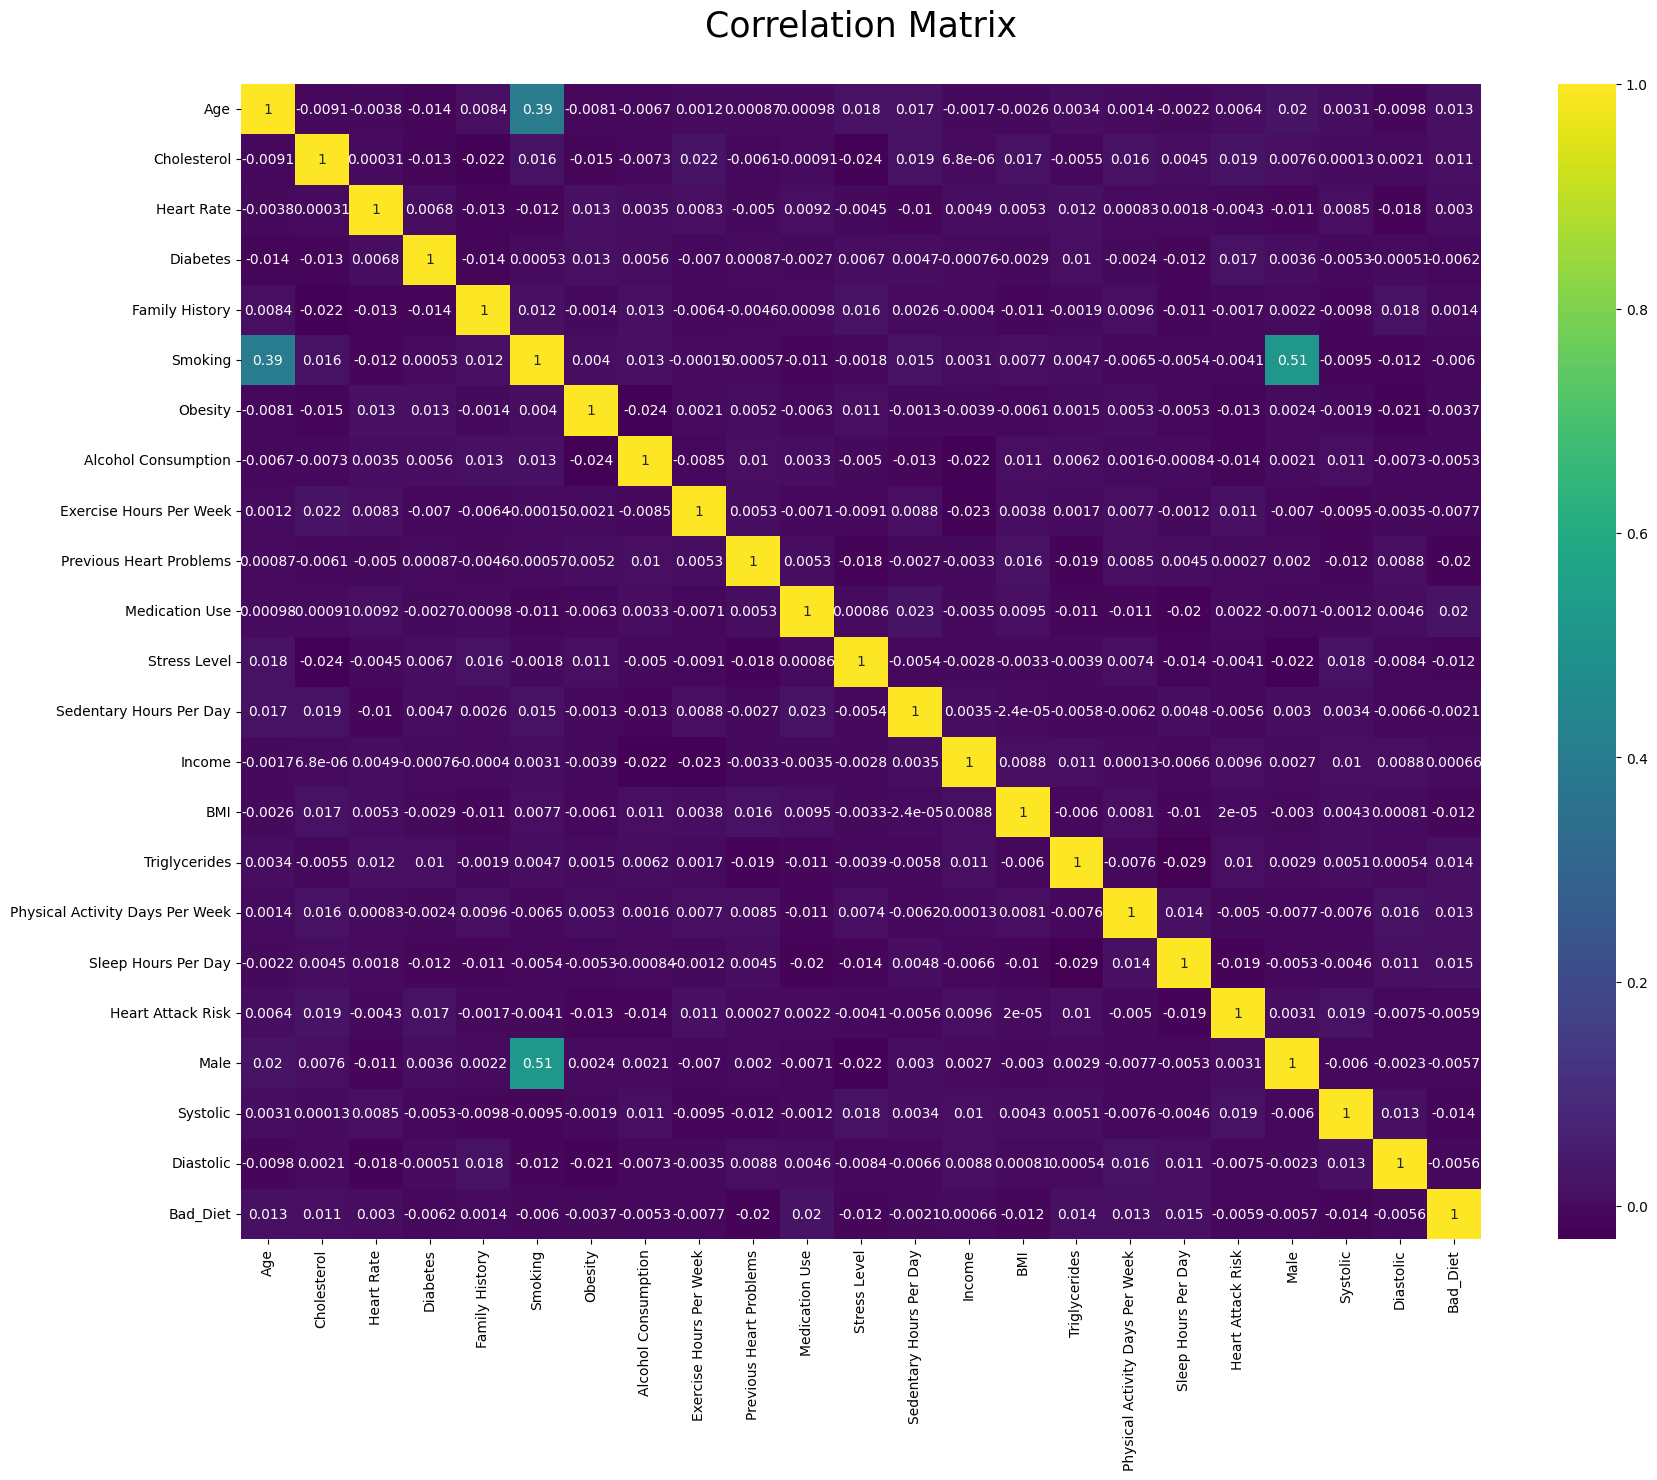

In [19]:
cmap = sns.color_palette("viridis", as_cmap=True)
fig,ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr,annot=True,cmap=cmap)
ax.set_title("Correlation Matrix\n",fontsize=25)
plt.show()

### From the Heatmap we can see that there is only a clear relation between 2 columns:
Findings:
- Smoking and Age, which makes sense & Smoking and Men.
- Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Weak
- Heart attack Risk is not much dependent on Sedentary Hours Per Day

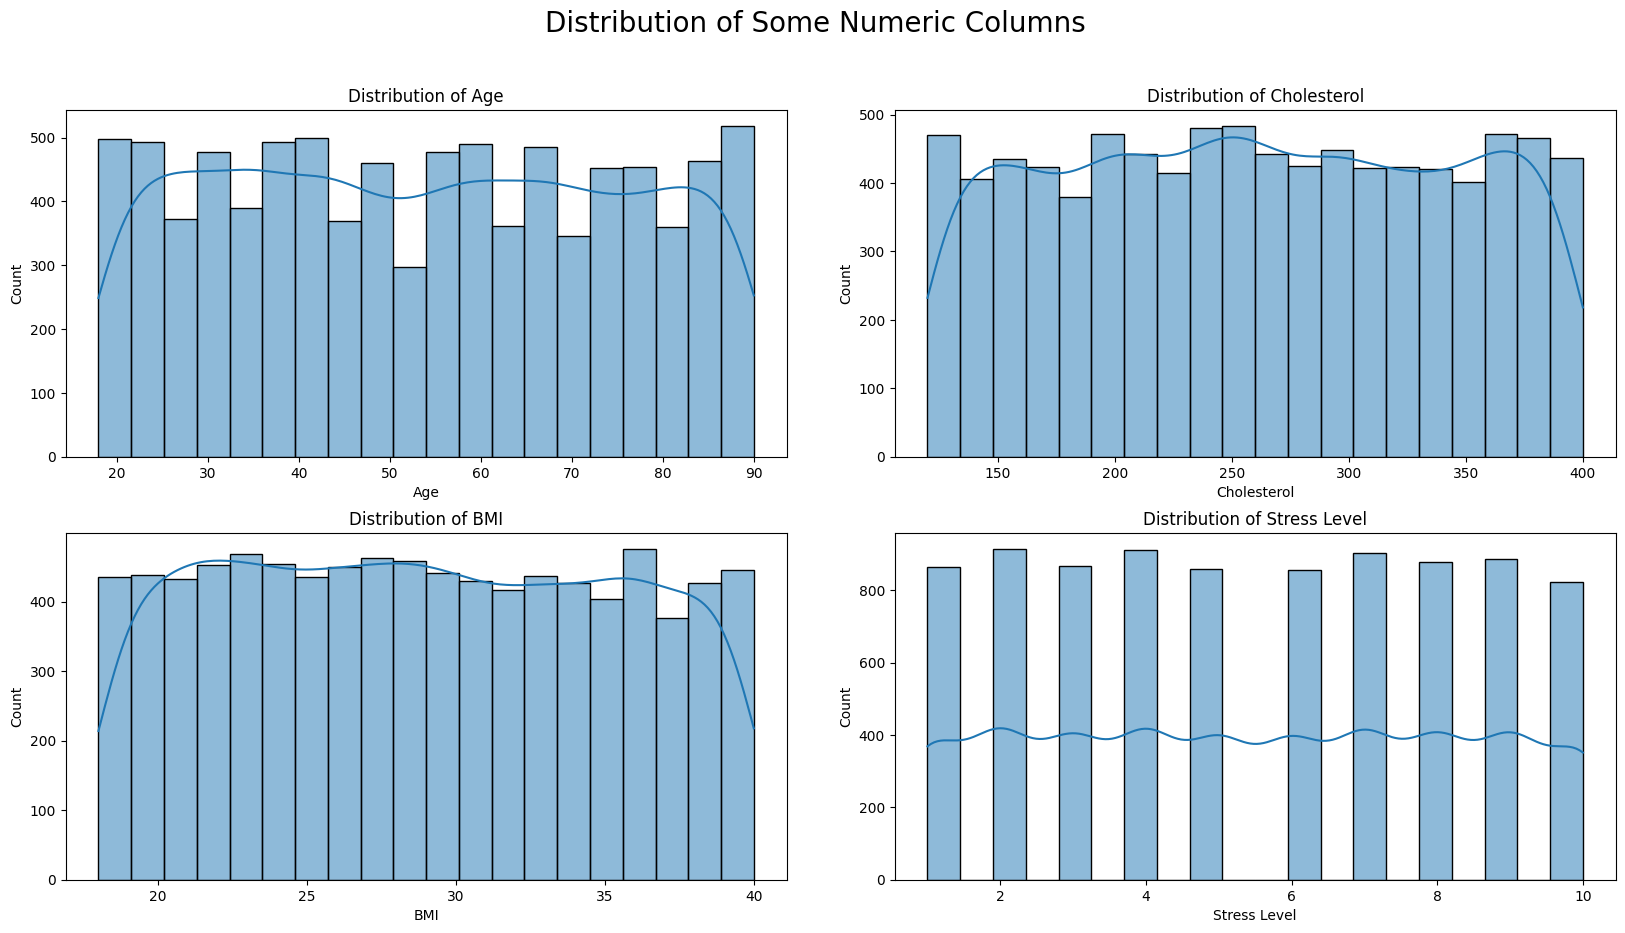

In [20]:
# Distribution of Age
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Distribution of Some Numeric Columns',fontsize=20)
fig.subplots_adjust(hspace=0.22, wspace=0.15)
sns.histplot(ax=ax[0,0], data=df7["Age"],bins=20, kde=True).set(title='Distribution of Age')
sns.histplot(ax=ax[0,1], data=df7["Cholesterol"],bins=20, kde=True).set(title='Distribution of Cholesterol')
sns.histplot(ax=ax[1,0], data=df7["BMI"],bins=20, kde=True).set(title='Distribution of BMI')
sns.histplot(ax=ax[1,1], data=df7["Stress Level"],bins=20, kde=True).set(title='Distribution of Stress Level')
plt.show()

### Now lets take a look at some of the divisions between the binary features

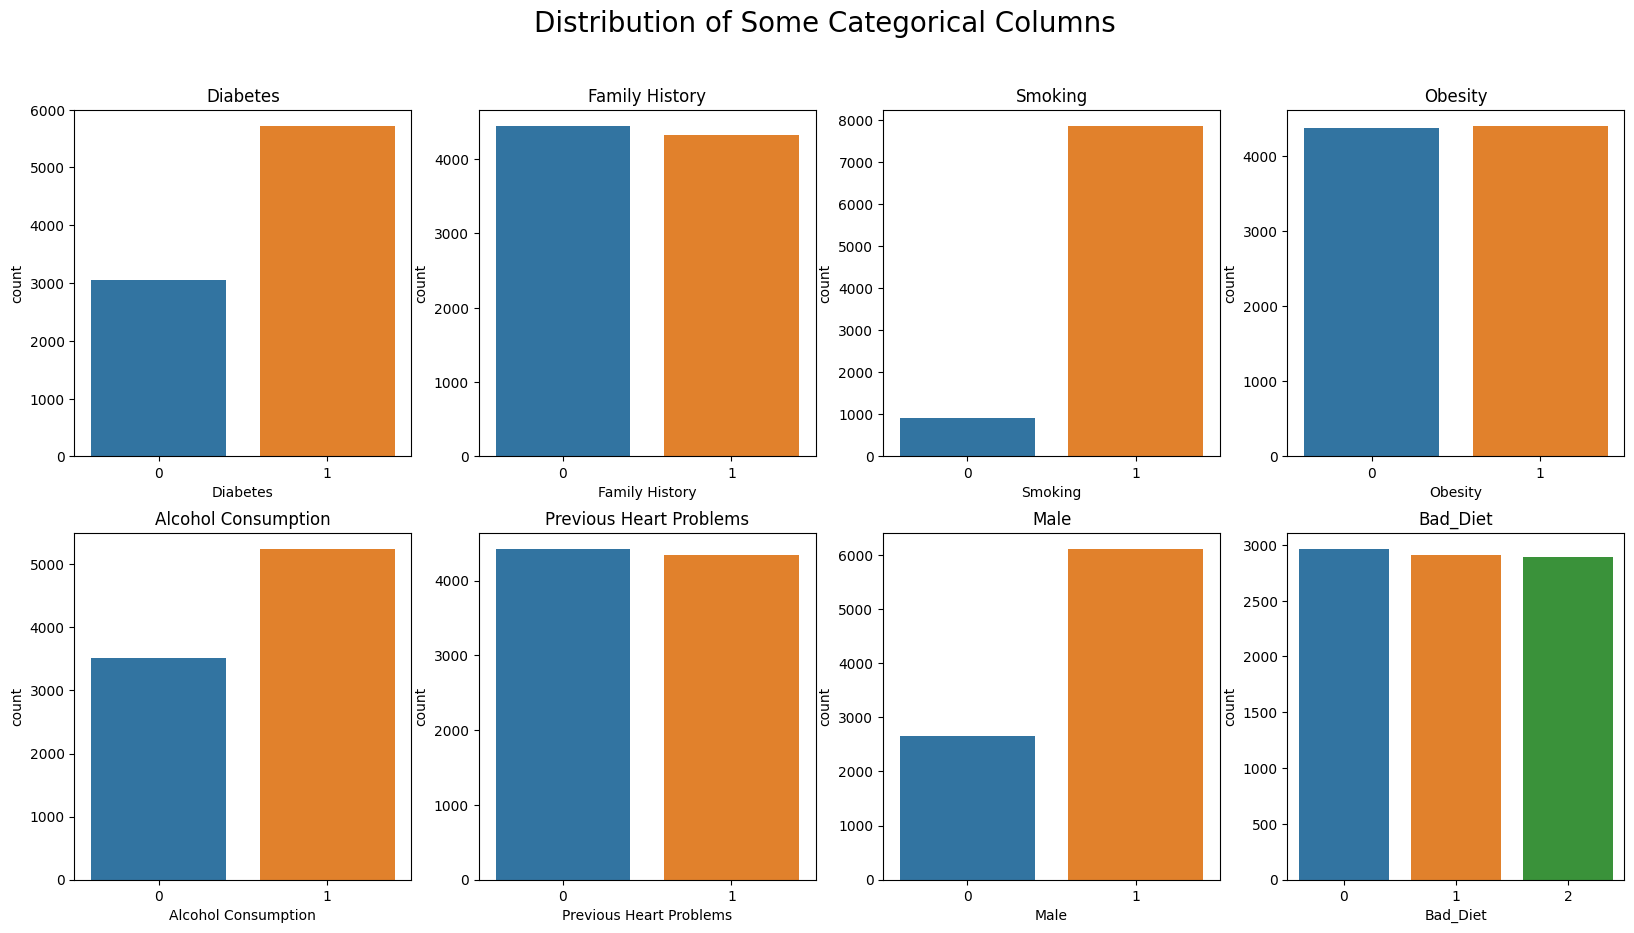

In [21]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
fig.suptitle('Distribution of Some Categorical Columns',fontsize=20)
fig.subplots_adjust(hspace=0.22, wspace=0.2)
sns.countplot(ax=ax[0,0], data=df7,x ='Diabetes').set(title='Diabetes')
sns.countplot(ax=ax[0,1], data=df7,x ='Family History').set(title='Family History')
sns.countplot(ax=ax[0,2], data=df7,x ="Smoking").set(title='Smoking')
sns.countplot(ax=ax[0,3], data=df7,x ="Obesity").set(title='Obesity')
sns.countplot(ax=ax[1,0], data=df7,x ="Alcohol Consumption").set(title='Alcohol Consumption')
sns.countplot(ax=ax[1,1], data=df7,x ="Previous Heart Problems").set(title='Previous Heart Problems')
sns.countplot(ax=ax[1,2], data=df7,x ="Male").set(title='Male')
sns.countplot(ax=ax[1,3], data=df7,x ="Bad_Diet").set(title='Bad_Diet')
plt.show()

### Since there is hardly any correlation in the data, scatter plots probably won't be very useful. However,the EDA that we can still do is look through come of the columns and compare the different labels 

<Figure size 1000x1000 with 0 Axes>

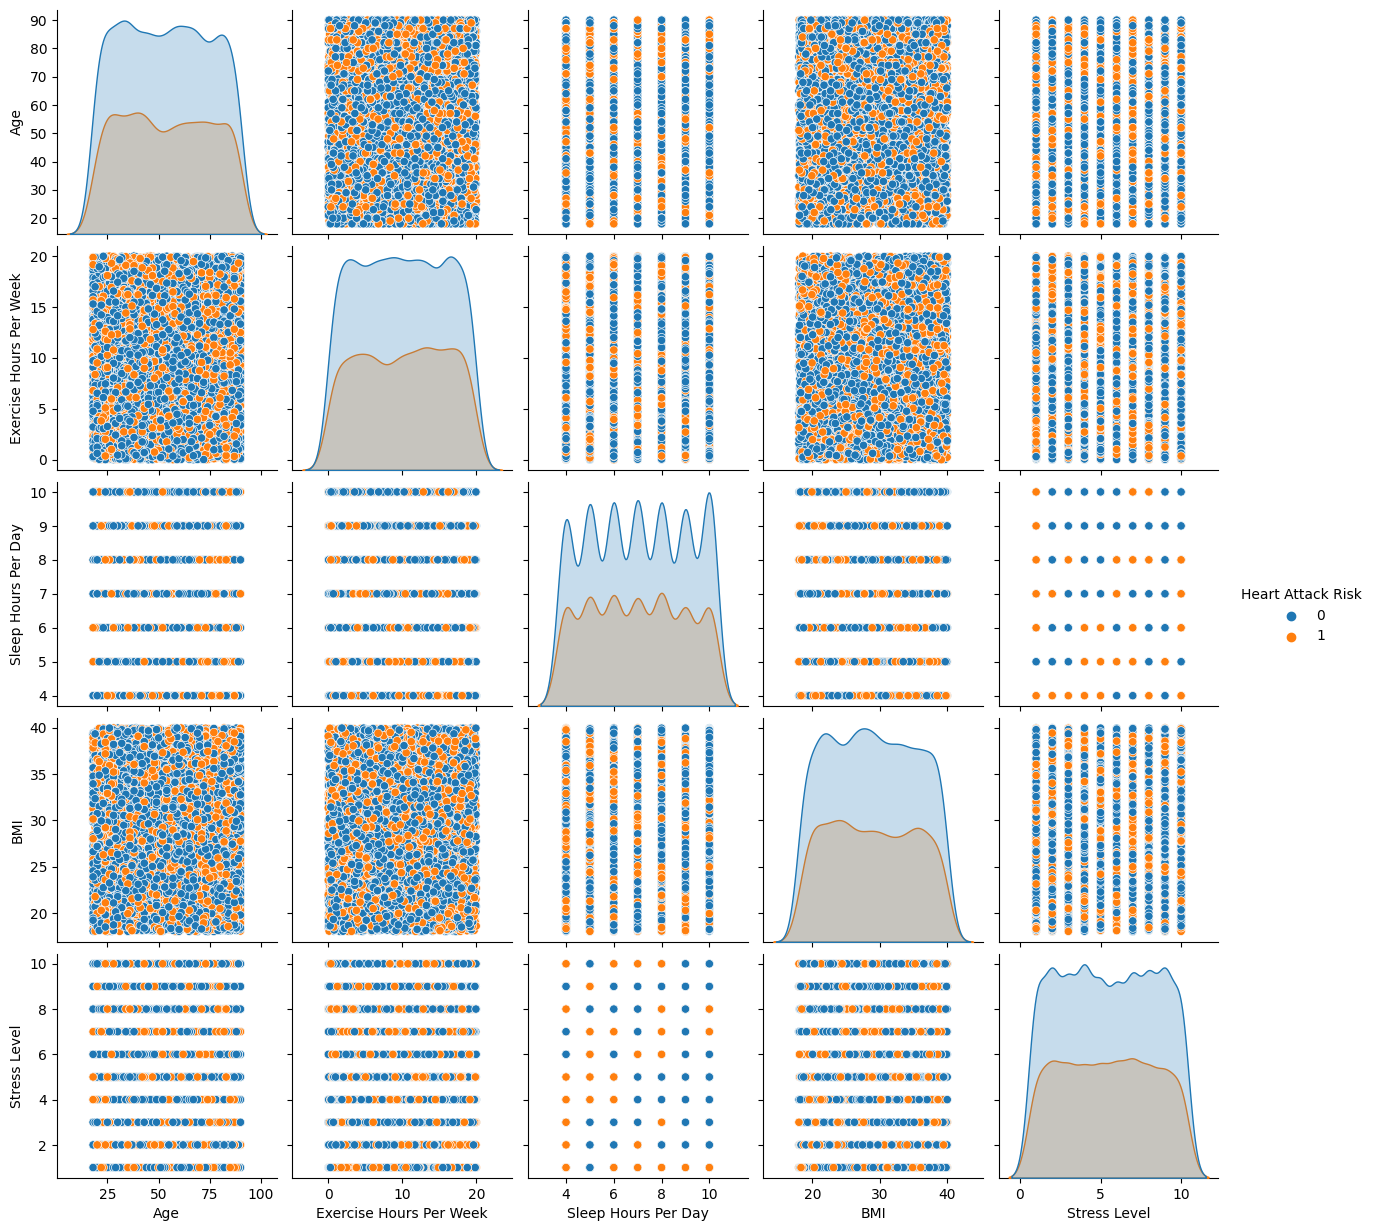

In [22]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df7, vars=['Age','Exercise Hours Per Week', 'Sleep Hours Per Day', 'BMI', 'Stress Level'], hue='Heart Attack Risk', diag_kind='kde')
plt.show()

### We can see thet the data is very uniformly distributed, whether or not the person is at risk of a heart disease

## Detecting outliers

In [23]:
for i in df7.columns:
    Q1 = df7[i].quantile(0.25)
    Q3 = df7[i].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    outliers = df7[(df7[i] < Q1 - threshold * IQR) | (df7[i] > Q3 + threshold * IQR)]
    print(f"{i:<35}Outliers : {outliers.shape[0]}")

Age                                Outliers : 0
Cholesterol                        Outliers : 0
Heart Rate                         Outliers : 0
Diabetes                           Outliers : 0
Family History                     Outliers : 0
Smoking                            Outliers : 904
Obesity                            Outliers : 0
Alcohol Consumption                Outliers : 0
Exercise Hours Per Week            Outliers : 0
Previous Heart Problems            Outliers : 0
Medication Use                     Outliers : 0
Stress Level                       Outliers : 0
Sedentary Hours Per Day            Outliers : 0
Income                             Outliers : 0
BMI                                Outliers : 0
Triglycerides                      Outliers : 0
Physical Activity Days Per Week    Outliers : 0
Sleep Hours Per Day                Outliers : 0
Heart Attack Risk                  Outliers : 0
Male                               Outliers : 0
Systolic                           Out

In [24]:
df7.Smoking.value_counts() # Not really outliers

Smoking
1    7859
0     904
Name: count, dtype: int64

# Data Preparation

In [25]:
X = df7.drop(["Heart Attack Risk"],axis = 1)
y = df7["Heart Attack Risk"]

In [26]:
X.shape

(8763, 22)

In [27]:
y.shape

(8763,)

## Scaling

Although not useful for every algorithm, it works for some and doesn't hurt the others. Since our data, is not heavy skewed on either side, just using sklearn's StandardScaler should be fine.

In [28]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X2 = pd.DataFrame(X_scaled,columns=X.columns,index = X.index)

In [29]:
X2.describe(); # Mean at 0, std = 1

## Train test Split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,shuffle=True,random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6134, 22)
(2629, 22)
(6134,)
(2629,)


# Model Selection

In [32]:
models = {'LogisticRegression' : LogisticRegression(),
         'DecisionTreeClassifier' : DecisionTreeClassifier(),
         'RandomForestClassifier' : RandomForestClassifier(),
         'GradientBoostingClassifier' : GradientBoostingClassifier(),
         'CatBoostClassifier' : CatBoostClassifier(verbose=0)}

### Baseline Models

In [33]:
def run_models(X_train,X_test,y_train,y_test):
    resultsdf = pd.DataFrame(columns = ['Model','Train_Accuracy',"Test_Accuracy","F1_Score","Roc_Auc"])
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(f"{name} trained.")
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_test)
    
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test,y_pred)
        
        results = {'Model': name, 'Train_Accuracy':train_accuracy, 'Test_Accuracy': test_accuracy, 'F1_Score': f1, 'Roc_Auc': roc_auc}
        resultsdf.loc[len(resultsdf)] = results
    return resultsdf

baseline = run_models(X_train,X_test,y_train,y_test)

LogisticRegression trained.
DecisionTreeClassifier trained.
RandomForestClassifier trained.
GradientBoostingClassifier trained.
CatBoostClassifier trained.


In [34]:
baseline.sort_values("F1_Score",ascending=False)

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
1,DecisionTreeClassifier,1.000000,0.546215,0.382185,0.511944
4,CatBoostClassifier,0.828171,0.634081,0.099251,0.508795
2,RandomForestClassifier,1.000000,0.638266,0.066732,0.507745
3,GradientBoostingClassifier,0.664493,0.635983,0.030395,0.501629
0,LogisticRegression,0.643300,0.638266,0.000000,0.500000


#### Even though all these algorithms hav decent accuracy allround, an F1 score near 0 shoes that it really isn't predicting anything.

# Feature Selection

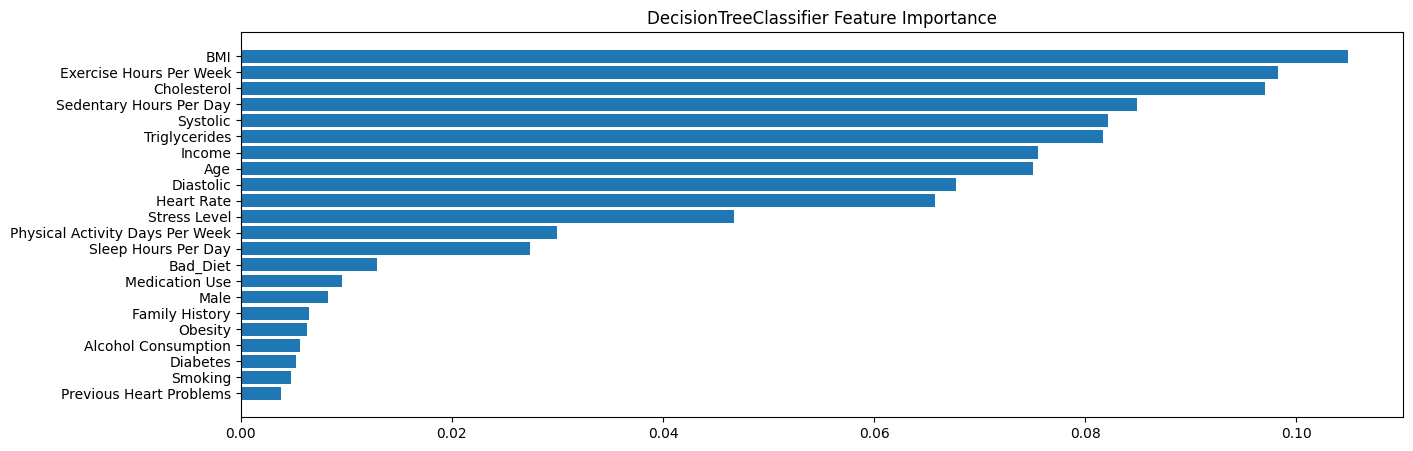

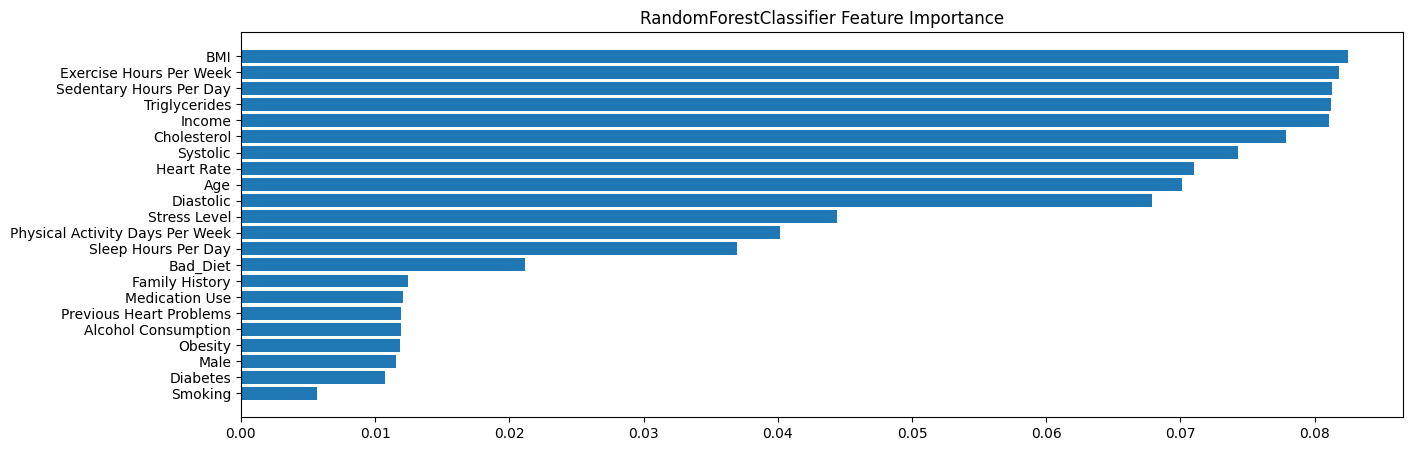

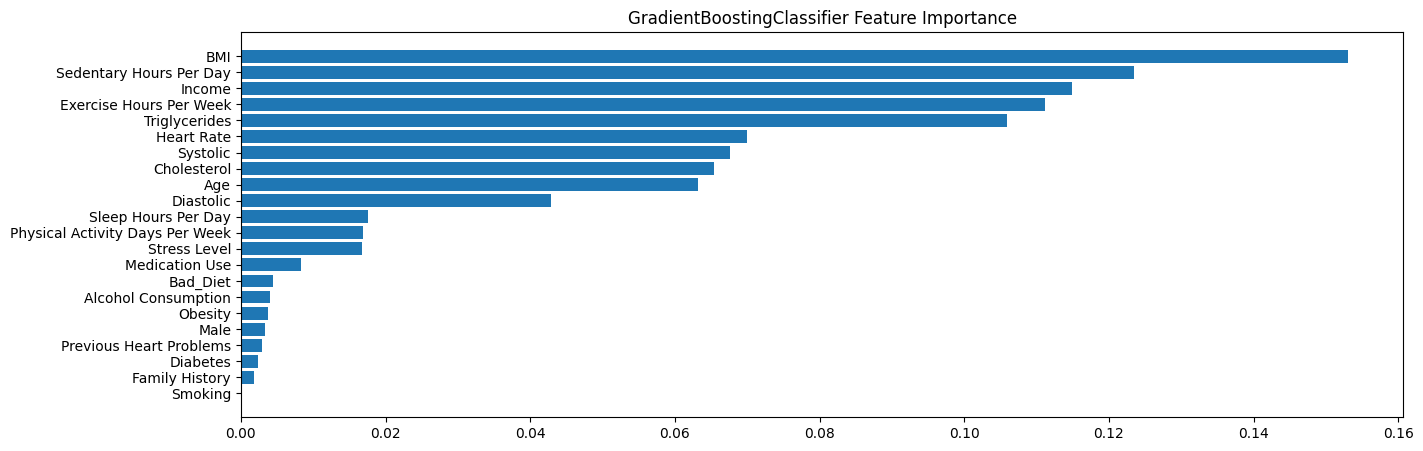

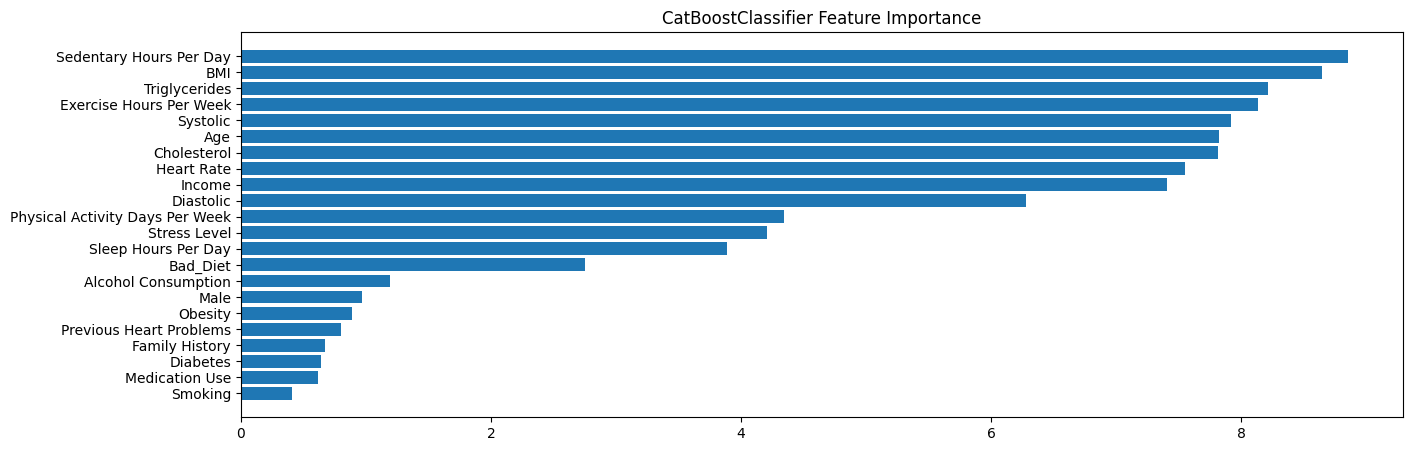

In [35]:
for name, model in models.items():
    try:
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        names = [X.columns[i] for i in indices]
        plt.figure(figsize=(15, 5))
        plt.title(f"{name} Feature Importance")
        plt.barh(range(X.shape[1]), importances[indices])
        plt.yticks(range(X.shape[1]), names)
        plt.gca().invert_yaxis()
        plt.show()
    except:
        pass


### Findings:
Most Important Features:
- BMI
- Exercise Hours Per Week
- Triglycerides

Least Important Features:
- Smoking
- Diabetes
- Previous Heart Problems
- Family History

Lets take these features out and try again.

In [36]:
X_select = X2.drop(["Smoking","Diabetes","Previous Heart Problems", "Family History","Medication Use"],axis=1)

In [37]:
X_train_select,X_test_select,y_train_select,y_test_select = train_test_split(X_select,y,test_size=0.3,shuffle=True,random_state=0)

In [38]:
feature_selection = run_models(X_train_select,X_test_select,y_train,y_test)

LogisticRegression trained.
DecisionTreeClassifier trained.
RandomForestClassifier trained.
GradientBoostingClassifier trained.
CatBoostClassifier trained.


In [39]:
feature_selection.sort_values(by="F1_Score",ascending=False)

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
1,DecisionTreeClassifier,1.000000,0.552301,0.387936,0.517623
4,CatBoostClassifier,0.829638,0.627235,0.095941,0.503204
2,RandomForestClassifier,1.000000,0.628376,0.059673,0.499314
3,GradientBoostingClassifier,0.664656,0.635223,0.026396,0.500577
0,LogisticRegression,0.643300,0.638266,0.000000,0.500000


#### Little Improvement

# Removing Imbalance

In [40]:
y.value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

#### There is a clear imbalance between 0s and 1s, in the target column making it so that a model can be ~63% accurate by just saying 0 everytime

In [41]:
5624 - 3139 

2485

In [42]:
to_drop = y.where(lambda x: x==0).dropna().sample(2485,random_state = 99).index #Not the best practice.

In [43]:
X_dropped = X_select.drop(to_drop,axis=0)

In [44]:
y_dropped = y.drop(to_drop)

In [45]:
X_train_dropped,X_test_dropped,y_train_dropped,y_test_dropped = train_test_split(X_dropped,y_dropped,test_size=0.3,shuffle=True,random_state=0)

In [46]:
dropped = run_models(X_train_dropped,X_test_dropped,y_train_dropped,y_test_dropped)

LogisticRegression trained.
DecisionTreeClassifier trained.
RandomForestClassifier trained.
GradientBoostingClassifier trained.
CatBoostClassifier trained.


In [47]:
dropped

,Model,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,LogisticRegression,0.521848,0.507431,0.493450,0.507592
1,DecisionTreeClassifier,1.000000,0.496815,0.495208,0.496846
2,RandomForestClassifier,1.000000,0.500531,0.486634,0.500689
3,GradientBoostingClassifier,0.708921,0.501592,0.492707,0.501699
4,CatBoostClassifier,0.945380,0.499469,0.505506,0.499418


#### This helped the F1 Score come up for every model by a significant margin.

# Correcting Overfitting [HyperParameter Tuning]

In [48]:
X_train_final = X_train_dropped
X_test_final = X_test_dropped
y_train_final = y_train_dropped
y_test_final = y_test_dropped

From this point on I will just be focusing on 3 models.
- Decision Tree Classifier
- Random Forest Classifier
- Catgorical Boost Classifier

In [49]:
def test_model(model):
    resultsdf = pd.DataFrame(columns = ['Train_Accuracy',"Test_Accuracy","F1_Score","Roc_Auc"])
    model.fit(X_train_final, y_train_final)
    y_pred_train = model.predict(X_train_final)
    y_pred = model.predict(X_test_final)
    train_accuracy = accuracy_score(y_train_final, y_pred_train)
    test_accuracy = accuracy_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)
    roc_auc = roc_auc_score(y_test_final,y_pred)
    results = {'Train_Accuracy':train_accuracy, 'Test_Accuracy': test_accuracy, 'F1_Score': f1, 'Roc_Auc': roc_auc}
    resultsdf.loc[0] = results
    return resultsdf

### Decision Tree Classifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt_results = test_model(dt)
dt_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,1.0,0.501062,0.504219,0.501042


In [52]:
# dt_params = {"max_depth" : [3,5,7,9,11],
#           "criterion" : ["gini", "entropy", "log_loss"],
#           "min_samples_split" : [2,4,6,8]
#          }

# tuned_dt = GridSearchCV(dt,dt_params,verbose=0,cv=5,return_train_score=True,scoring='f1')
# tuned_dt.fit(X_train,y_train)
# tuned_dt.best_params_

In [53]:
best_dt = DecisionTreeClassifier(criterion='gini', max_depth = 11, min_samples_split =2) #Parameters from GridSearchCV above
dt_results = test_model(best_dt)
dt_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,0.63746,0.500531,0.355921,0.501737


#### Didn't really work

### Random Forest Classifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf_results = test_model(rf)
rf_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,1.0,0.485669,0.479871,0.485742


In [56]:
# rf_params = {'n_estimators' : [10,20,30,50,100],
#              "max_depth" : [2,4,6,8]}

# tuned_rf = GridSearchCV(rf,rf_params,verbose=0,cv=5,return_train_score=False,scoring='f1')
# tuned_rf.fit(X_train,y_train)
# tuned_rf.best_params_

In [57]:
best_rf = RandomForestClassifier(max_depth = 8,n_estimators = 10) #Parameters from GridSearchCV above
rf_results = test_model(best_rf)
rf_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,0.742831,0.503185,0.497854,0.503255


#### Worked a bit. Probably resulted in better model.

### Categorical Boost Classifier

In [58]:
cb = CatBoostClassifier(verbose=0)

In [59]:
cb_results = test_model(cb)
cb_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,0.94538,0.499469,0.505506,0.499418


In [60]:
# cb_params ={"depth" : [4,8,10],
#             'learning_rate' : [0.5,0.75],
#             'iterations' : [20,30,50],
#             "random_strength" :[2,5,10]
#          }

# tuned_cb = GridSearchCV(cb,cb_params,verbose=0,cv=5,return_train_score=False,scoring='f1')
# tuned_cb.fit(X_train,y_train)
# tuned_cb.best_params_

In [61]:
best_cb = CatBoostClassifier(depth = 8,iterations = 30,learning_rate=0.5, random_strength=5,verbose=0) #Parameters from GridSearchCV above
cb_results = test_model(best_cb)
cb_results

,Train_Accuracy,Test_Accuracy,F1_Score,Roc_Auc
0,0.840237,0.518047,0.515475,0.518089


#### The best accuracy and f1 score of all the models.

#### Despite my best efforts to avoid overfitting, the models still tended to do it. When limiting max depth too much it cam at a high cost of accuracy. Each of the GridSearchCVs done on the models aimed to maximize their f1_score. Even though it did improve it, the difference was very minute.

# Conclusion

Given the data that I was, which mostly comprised of superficial attributes of a person, I couldn't predict the risk of a heart attack for a given person. Maybe if the features were more scientific, like the division of Cholesterol into HDL and LDL would have helped. Something that could have improved the model more would be correctly balancing the labelled data, by not just removing a bunch of data. Furthermore, none of these methods used neural networks/deep learning models. This could be an interesting avenue to go down next time.
As it stands, it is best to say that we shouldn't use this model to predict a person's risk of having a heart attack.